<a href="https://colab.research.google.com/github/ishika-0810/Heart-Disease-Prediction-/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tkinter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


import seaborn as sns
from sklearn import metrics
# Other libraries
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
heart = pd.read_csv("heart_h.csv")

In [4]:
heart.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.isnull().count


<bound method DataFrame.count of        age    sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  target
0    False  False  False     False  False  ...    False  False  False  False   False
1    False  False  False     False  False  ...    False  False  False  False   False
2    False  False  False     False  False  ...    False  False  False  False   False
3    False  False  False     False  False  ...    False  False  False  False   False
4    False  False  False     False  False  ...    False  False  False  False   False
..     ...    ...    ...       ...    ...  ...      ...    ...    ...    ...     ...
298  False  False  False     False  False  ...    False  False  False  False   False
299  False  False  False     False  False  ...    False  False  False  False   False
300  False  False  False     False  False  ...    False  False  False  False   False
301  False  False  False     False  False  ...    False  False  False  False   False
302  False  False  False     Fal

In [6]:
#finding correlation of each attribute 
correlation= heart.corr()
correlation
#Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. 
#A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates
#the extent to which one variable increases as the other decreases

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Correlation in Dataset')

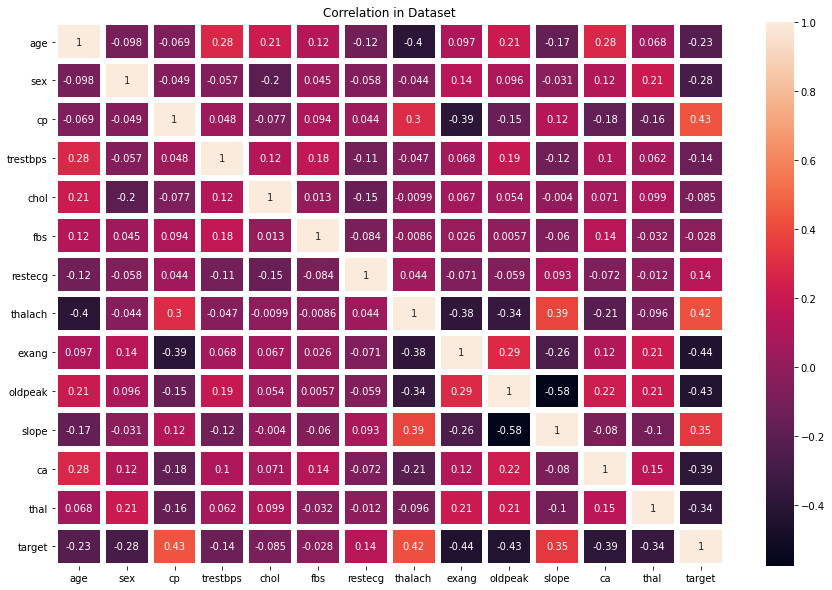

In [7]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, linewidth = 5)
plt.title('Correlation in Dataset')

In [8]:
#Statistics on data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


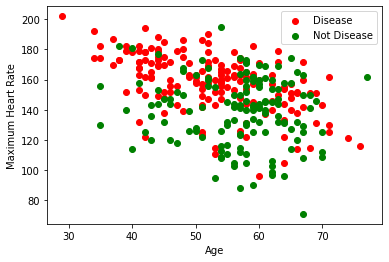

In [9]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [11]:
min_max = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[columns_to_scale ] = min_max.fit_transform(heart[columns_to_scale])
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [13]:
final_Result = knn_classifier.predict(X_test)
print(final_Result)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0]


In [14]:
print("Training data:",X_train.shape)
print("Traning data :",y_train.shape)
print("Testing data :",X_test.shape)

Training data: (212, 13)
Traning data : (212,)
Testing data : (91, 13)


In [15]:
knn_acc_score = accuracy_score(y_test, final_Result)
print("Accuracy is :",knn_acc_score*100)

Accuracy is : 87.91208791208791


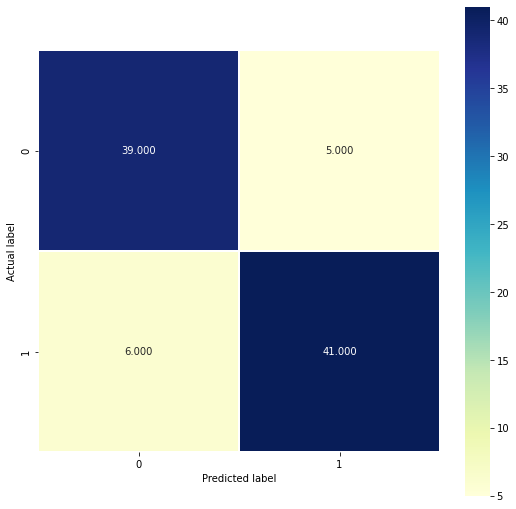

In [16]:
cm = metrics.confusion_matrix(y_test, final_Result)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Let's Compare performence of KNN algorithm with Support vector machine
What are Support Vector Machines? Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data.

In [18]:
min_max = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[columns_to_scale ] = min_max.fit_transform(heart[columns_to_scale])
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC()  
classifier.fit(X_Train, y_Train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
svc=classifier.predict(X_Test)

In [21]:
svc_acc_score = accuracy_score(y_Test, svc)
print("Accuracy is :",svc_acc_score*100)

Accuracy is : 82.41758241758241


In [22]:
cm = metrics.confusion_matrix(y_test, svc)

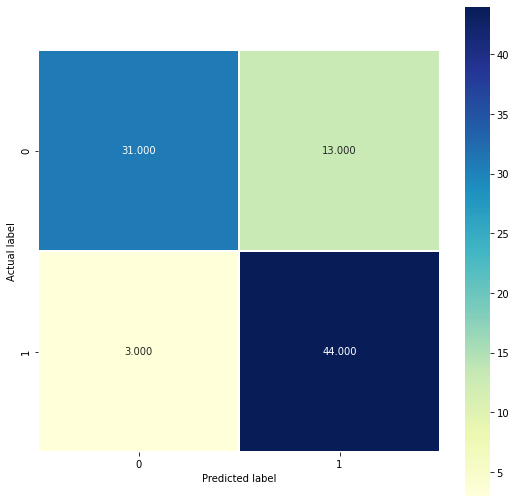

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Logistic Regression


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_Train, y_Train)
lr_predict = lr.predict(X_Test)
lr_conf_matrix = confusion_matrix(y_Test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)


In [25]:
lr_acc_score 

0.8021978021978022

In [26]:
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[32 12]
 [ 6 41]]


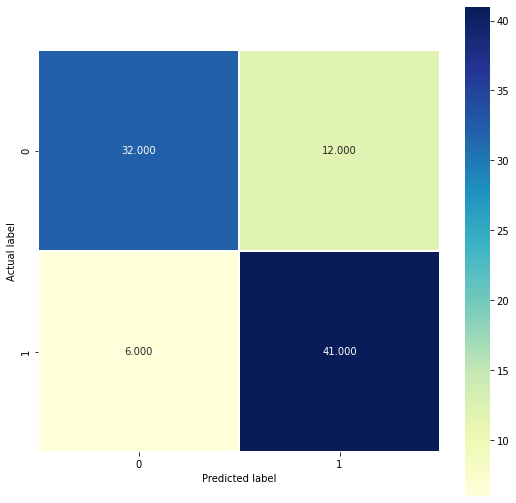

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(lr_conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [29]:
model_com = pd.DataFrame({'Model': ['K-Nearest Neighbour','Support Vector Machine','Logistic Regression'], 
                         'Accuracy': [knn_acc_score*100,svc_acc_score*100,lr_acc_score*100]})
model_com

,Model,Accuracy
0,K-Nearest Neighbour,87.912088
1,Support Vector Machine,82.417582
2,Logistic Regression,80.219780


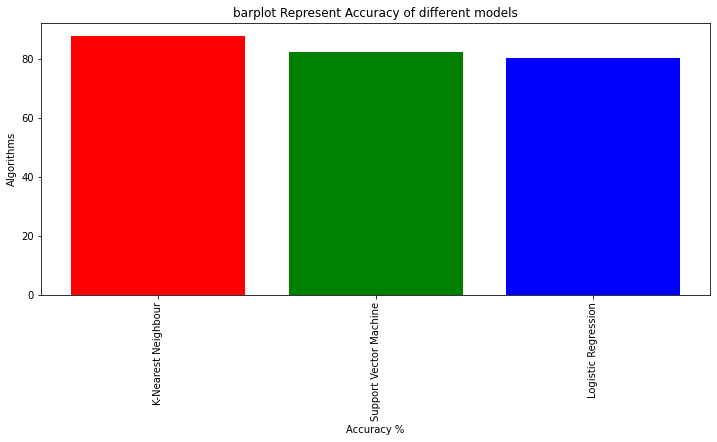

In [30]:
colors = ['red','green','blue']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_com['Model'],model_com['Accuracy'],color = colors)
plt.show()